In [1]:
from astropy import units
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
from numpy import sum
import seaborn
import corner
from scipy.optimize import curve_fit
from scipy.interpolate import RegularGridInterpolator 
from scipy.interpolate import RectBivariateSpline
#from matplotlib.mlab import griddata
from scipy.interpolate import griddata
from scipy import interpolate
import sys
from tqdm import tqdm
%matplotlib inline

/Users/nataliegosnell/miniconda3/envs/astroconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/nataliegosnell/miniconda3/envs/astroconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/nataliegosnell/miniconda3/envs/astroconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
logt_He, logg_He, Mo_He, Ro_He, age = np.loadtxt('../Natalie/mygrid.txt', unpack=True)
temp_He = 10.0**(logt_He)

In [5]:
g1, t1, g2, t2 = np.loadtxt('posterior_setdist_plummer.txt', unpack=True)

In [6]:
g1_in = g1[np.where(g1 < 7.7)]
t1_in = t1[np.where(g1 < 7.7)]
g1_out = g1[np.where(g1 >= 7.7)]
t1_out = t1[np.where(g1 >= 7.7)]

modage_He_in = griddata((logt_He, logg_He), age, (np.log10(t1_in), g1_in), method='linear', fill_value=1e20)
modage_He_out = griddata((logt_He, logg_He), age, (np.log10(t1_out), g1_out), method='nearest', fill_value=1e20)

In [155]:
print(len(g1_in)+len(g1_out))
print(len(g1_out))
print(1441. / 40500.)

40500
1441
0.0355802469136


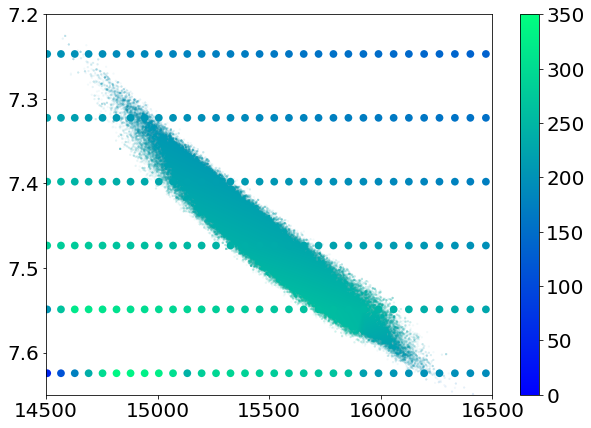

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_ylim([7.65,7.2])
ax.set_xlim([14500,16500])
ax.scatter(t1_in, g1_in, c=modage_He_in, s=5, edgecolor='none', cmap="winter", vmin=0, vmax=350, alpha=0.05)
ax.scatter(t1_out, g1_out, c=modage_He_out, s=5, edgecolor='none', cmap="winter", vmin=0, vmax=350, alpha=0.05)
cax = ax.scatter(temp_He, logg_He, c=age, s=60, edgecolor='none', cmap="winter", vmin=0, vmax=350)
cbar = fig.colorbar(cax, orientation='vertical')
plt.show()

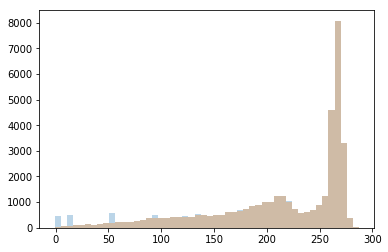

In [50]:
allages = np.append([modage_He_in],[modage_He_out])
plt.hist(allages,bins=50,alpha=0.3)
plt.hist(modage_He_in,bins=50,alpha=0.3)
plt.show()

In [8]:
interpt = np.arange(14500, 16500, 10)
interpg = np.arange(7.2, 7.64999, 0.00224995)
print(len(interpt))
print(len(interpg))

200
200


In [9]:
interpage = griddata((logt_He, logg_He), age, (np.log10(interpt), interpg), method='linear', fill_value=1e20)

In [10]:
numIndexes = 500
yi = np.linspace(14500, 16500,numIndexes)
xi = np.linspace(7.2, 7.65,numIndexes)
yArray = temp_He
xArray = logg_He
heightArray = age
xi, yi = np.meshgrid(xi, yi)
points = np.vstack((xArray,yArray)).T
values = np.asarray(heightArray)
points = np.asarray(points)
DEM = interpolate.griddata(points, values, (xi,yi), method='cubic')

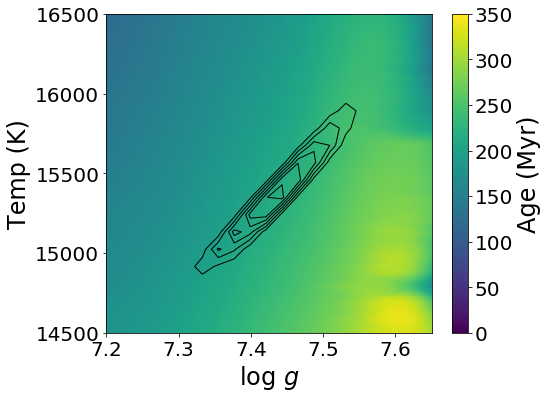

In [18]:
plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title

fig, ax = plt.subplots(figsize=(8,6))

#ax.set_adjustable('box-forced')
plt.imshow(DEM, cmap ='viridis',origin='lower',extent=[7.2,7.65,14000,16500], aspect='auto', vmin=0, vmax=350)
cbar = plt.colorbar()
cbar.set_label('Age (Myr)')
ax.set_xlabel(r'log $g$')
ax.set_ylabel('Temp (K)')

ax.axis([7.2,7.65,14500,16500])
#ax.set_aspect(2)
#xArrayNormalized=xArray/(np.max(xArray)-np.min(xArray))
#xArrayNormalized-=np.min(xArrayNormalized)
#yArrayNormalized=yArray/(np.max(yArray)-np.min(yArray))
#yArrayNormalized-=np.min(yArrayNormalized)
#plt.scatter(numIndexes*xArrayNormalized,numIndexes*yArrayNormalized,color='k',alpha=0.25)
#plt.scatter(xArray,yArray,color='k',alpha=0.2)


allt = np.append([t1_in],[t1_out])
allg = np.append([g1_in],[g1_out])

from matplotlib.colors import LogNorm
counts, xbins, ybins = np.histogram2d(allg, allt, bins=19, normed=LogNorm())

plt.contour(xbins[:-1],ybins[:-1],counts.transpose(),
    extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],
    linewidths=1,colors='black',linestyles='solid');

plt.tight_layout()

#ax.scatter(t1_in, g1_in, s=5, edgecolor='none', color='k', alpha=0.05)
#ax.scatter(t1_out, g1_out, s=5, edgecolor='none', color='grey', alpha=0.05)
plt.savefig('WOCS5379_age_plummer.pdf',dpi=900)

In [140]:
logt_d, logg_d, Mass_d, Mass_err, Age_d, Age_err = np.loadtxt('elm_althaus13.dat', unpack=True, delimiter="|")

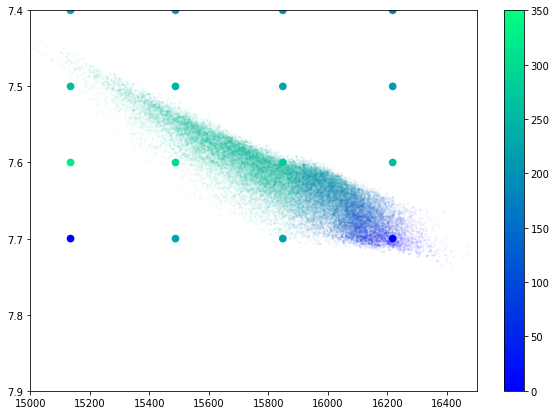

In [144]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_ylim([7.9,7.4])
ax.set_xlim([15000,16500])
ax.scatter(t1_in, g1_in, c=modage_He_in, s=5, edgecolor='none', cmap="winter", vmin=0, vmax=350, alpha=0.05)
ax.scatter(t1_out, g1_out, c=modage_He_out, s=5, edgecolor='none', cmap="winter", vmin=0, vmax=350, alpha=0.05)
cax = ax.scatter(10.0**logt_d, logg_d, c=Age_d, s=60, edgecolor='none', cmap="winter", vmin=0, vmax=350)
#ax.scatter(temp_He, logg_He, c=age, s=60, edgecolor='none', cmap="winter", vmin=0, vmax=350)
cbar = fig.colorbar(cax, orientation='vertical')
plt.show()

In [81]:
np.random.seed(0)
grid = np.random.rand(4, 4)
grid

array([[ 0.5488135 ,  0.71518937,  0.60276338,  0.54488318],
       [ 0.4236548 ,  0.64589411,  0.43758721,  0.891773  ],
       [ 0.96366276,  0.38344152,  0.79172504,  0.52889492],
       [ 0.56804456,  0.92559664,  0.07103606,  0.0871293 ]])

In [139]:
!pwd

/Users/Natalie/hst/13354/mod/WD-fitting
